In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax
import jax.numpy as jnp
import jax.lax as lax
import numpy as np
from functools import partial
from pycox.datasets import metabric
import survival_jax.metrics as metrics
import survival_jax.km as km
import pandas as pd

In [6]:
df = metabric.read_df()
df.sort_values("duration", inplace=True)
df.reset_index(drop=True, inplace=True)
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,duration,event
0,7.220886,5.526921,9.640237,6.258209,0.0,0.0,0.0,0.0,51.419998,0.000000,0
1,5.818934,6.470783,10.672935,5.630679,0.0,0.0,0.0,1.0,75.330002,0.100000,1
2,10.117913,5.335094,9.717084,5.893656,0.0,0.0,0.0,0.0,54.099998,0.766667,0
3,5.705204,8.450347,10.859011,5.667925,0.0,0.0,0.0,1.0,73.639999,1.233333,0
4,5.184060,8.427523,10.361415,5.575082,1.0,0.0,0.0,1.0,73.980003,1.266667,0
...,...,...,...,...,...,...,...,...,...,...,...
1899,5.567494,5.818224,11.343552,5.574574,0.0,1.0,0.0,1.0,58.799999,335.600006,1
1900,7.803252,5.352677,10.012809,6.017503,0.0,0.0,0.0,1.0,67.459999,335.733337,1
1901,6.100280,7.107530,10.501780,6.268520,0.0,0.0,0.0,1.0,29.980000,337.033325,0
1902,5.490514,7.606261,12.297510,6.313382,0.0,1.0,0.0,1.0,63.169998,351.000000,1


In [13]:
times = df.duration.values
events = df.event.values

In [14]:
survival_prob, death_t = km.kaplan_meier(times, events)

In [15]:
import matplotlib.pyplot as plt

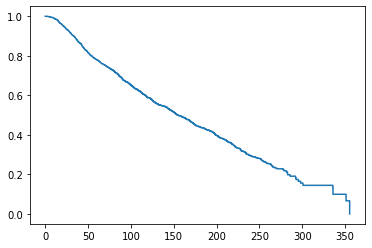

In [16]:
plt.plot(death_t, survival_prob, drawstyle='steps-post')

In [17]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [18]:
%%timeit
kmf.fit(times, event_observed=events)

15.2 ms ± 1.48 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
kmf.median_survival_time_

154.0

<AxesSubplot:xlabel='timeline'>

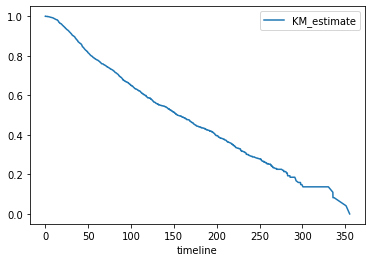

In [20]:
kmf.survival_function_.plot()